<h1 align="center"> Breast Cancer Dataset </h1>

# Daftar Isi
<ul>
<li><a href="#question">Business Question</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclude">Conclusion</a></li>
</ul>

<a id='question'></a>
## Business Question

<ul>
<ol><a href="#q1">1 | Apakah faktor terbesar yang mempengaruhi tingkat keganasan tumor ?</a></ol>
<ol><a href="#q2">2 | Data Wrangling</a></ol>
<ol><a href="#q3">3 | Exploratory Data Analysis</a></ol>
</ul>

<a id='wrangle'></a>
## Data Wrangling

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('./data/cancer_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,NaN,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,NaN,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
df.shape

(569, 32)

In [57]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
radius_SE                 569 non-null float64
texture_SE                548 non-null float64
perimeter_SE              569 non-null float64
area_SE                   569 non-null float64
smoothness_SE             521 non-null float64
compactness_SE            569 non-null float64
concavity_SE              569 non-null float64
conca

In [58]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Bolong

In [59]:
#Cek berapa data yang bolong 
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

In [60]:
# Mengisi data yang bolong dengan nilai Mean
df = df.fillna(df.mean())

### Data duplikat

In [61]:
# Cek berapa data yang duplikat
df.duplicated().sum()

5

In [62]:
# Membuang data yang duplikat
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### 1. 

Number of Benign	:	  354
Number of Malignant	:	  210
Percentage Benign	:	  62.77 %
Percentage Malignant	:	  37.23 %


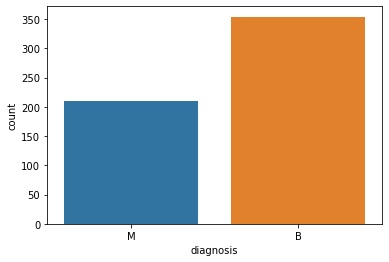

In [63]:
sns.countplot(df['diagnosis'],label="Count")    
B, M = df['diagnosis'].value_counts()

print('Number of Benign\t:\t ',B)
print('Number of Malignant\t:\t ',M)
print('Percentage Benign\t:\t % 2.2f %%' % (B/(B+M)*100))
print('Percentage Malignant\t:\t % 2.2f %%' % (M/(B+M)*100))

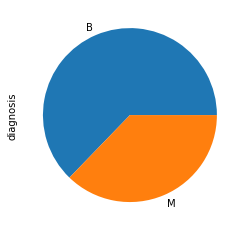

In [64]:
df['diagnosis'].value_counts().plot(kind='pie')

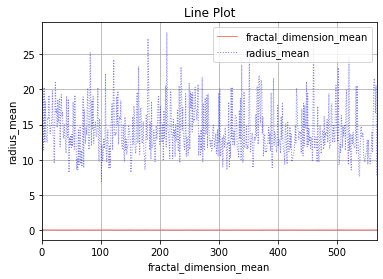

In [75]:
df.fractal_dimension_mean.plot(kind="line", color = "r", label="fractal_dimension_mean", linewidth= 1, alpha = 0.5, grid = True,linestyle = "-")
df.radius_mean.plot(color ="b", label = "radius_mean",linewidth=1,alpha=0.5,grid=True,linestyle=":")
plt.legend()
plt.xlabel("fractal_dimension_mean")
plt.ylabel("radius_mean")
plt.title("Line Plot")
plt.show()


In [77]:
features_mean= list(df.columns[1:11])

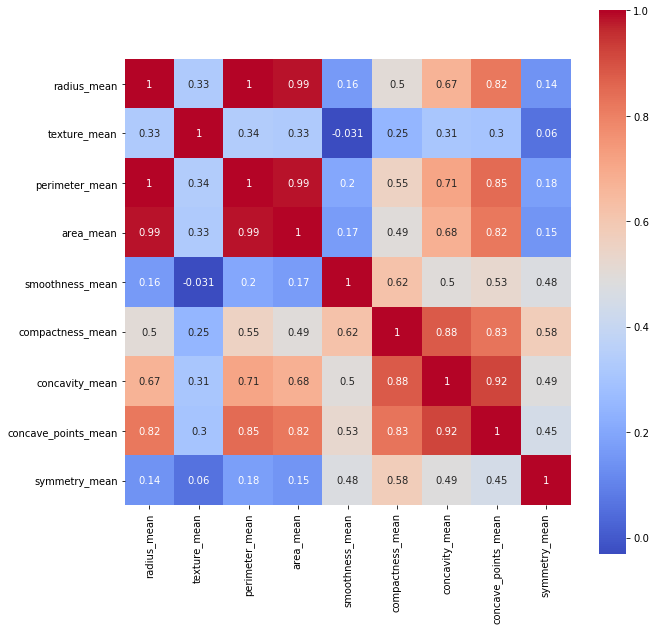

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

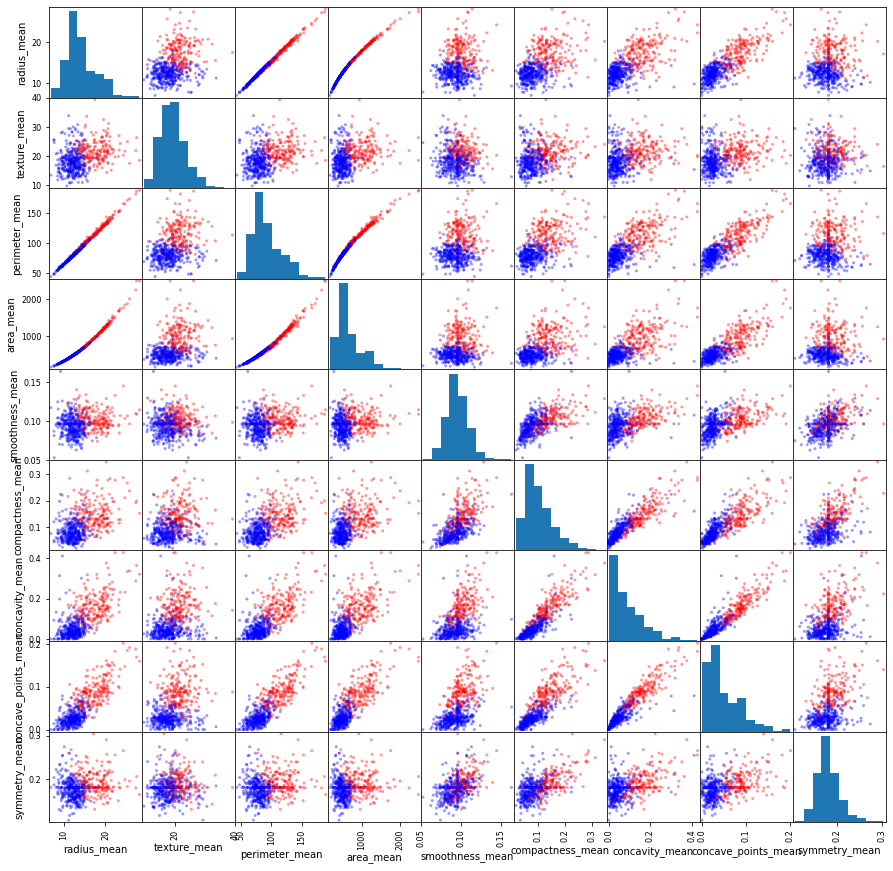

In [85]:
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()